# Website dataset

In [1]:
import pandas as pd
df = pd.read_csv('classification.tsv', sep='\t', error_bad_lines=False)# data.columns = ["a", "b", "c"]
df.head()

b'Skipping line 199: expected 4 fields, saw 5\nSkipping line 597: expected 4 fields, saw 5\nSkipping line 614: expected 4 fields, saw 5\nSkipping line 683: expected 4 fields, saw 5\nSkipping line 1146: expected 4 fields, saw 5\nSkipping line 1411: expected 4 fields, saw 5\nSkipping line 1431: expected 4 fields, saw 5\nSkipping line 1532: expected 4 fields, saw 5\nSkipping line 1578: expected 4 fields, saw 5\nSkipping line 3299: expected 4 fields, saw 5\nSkipping line 3325: expected 4 fields, saw 5\nSkipping line 3375: expected 4 fields, saw 5\nSkipping line 3468: expected 4 fields, saw 5\nSkipping line 3469: expected 4 fields, saw 5\nSkipping line 3767: expected 4 fields, saw 5\nSkipping line 3770: expected 4 fields, saw 5\nSkipping line 3842: expected 4 fields, saw 5\nSkipping line 4150: expected 4 fields, saw 5\nSkipping line 5051: expected 4 fields, saw 5\nSkipping line 5290: expected 4 fields, saw 5\nSkipping line 5386: expected 4 fields, saw 5\nSkipping line 7298: expected 4 field

,Primary Category,Secondary Category,Title,URL
0,Arts & Humanities,Architecture,68 Dean Street,http://www.sixty8.com/
1,Arts & Humanities,Architecture,Abandoned Communities,http://www.abandonedcommunities.co.uk/
2,Arts & Humanities,Architecture,Alexander Thomson Society,http://www.greekthomson.com/
3,Arts & Humanities,Architecture,"Arab British Centre, The",http://www.arabbritishcentre.org.uk/
4,Arts & Humanities,Architecture,Architectural Association School of Architecture,http://www.aaschool.ac.uk/


In [2]:
df.shape

(26798, 4)

In [3]:
df['Primary Category'].head()

0    Arts & Humanities
1    Arts & Humanities
2    Arts & Humanities
3    Arts & Humanities
4    Arts & Humanities
Name: Primary Category, dtype: object

In [4]:
df['Title'].head()

0                                      68 Dean Street
1                               Abandoned Communities
2                           Alexander Thomson Society
3                            Arab British Centre, The
4    Architectural Association School of Architecture
Name: Title, dtype: object

In [5]:
df = df[['Primary Category', 'Title']]

In [6]:
df.head()

,Primary Category,Title
0,Arts & Humanities,68 Dean Street
1,Arts & Humanities,Abandoned Communities
2,Arts & Humanities,Alexander Thomson Society
3,Arts & Humanities,"Arab British Centre, The"
4,Arts & Humanities,Architectural Association School of Architecture


In [7]:
df.rename(columns = {'Primary Category':'Category'}, inplace = True)
print(df.Category.unique())
# print(len(l))

['Arts & Humanities' 'Business, Economy & Industry' 'Company Web Sites'
 'Computer Science, Information Technology and Web Technology'
 'Crime, Criminology, Police and Prisons' 'Digital Society'
 'Education & Research' 'Environment' 'Government, Law & Politics'
 'History' 'Law and Legal System' 'Libraries, Archives and Museums'
 'Life Sciences' 'Literature' 'Medicine & Health'
 'Politics, Political Theory and Political Systems' 'Popular Science'
 'Publishing, Printing and Bookselling' 'Religion' 'Science & Technology'
 'Social Problems and Welfare' 'Society & Culture' 'Sports and Recreation'
 'Travel & Tourism']


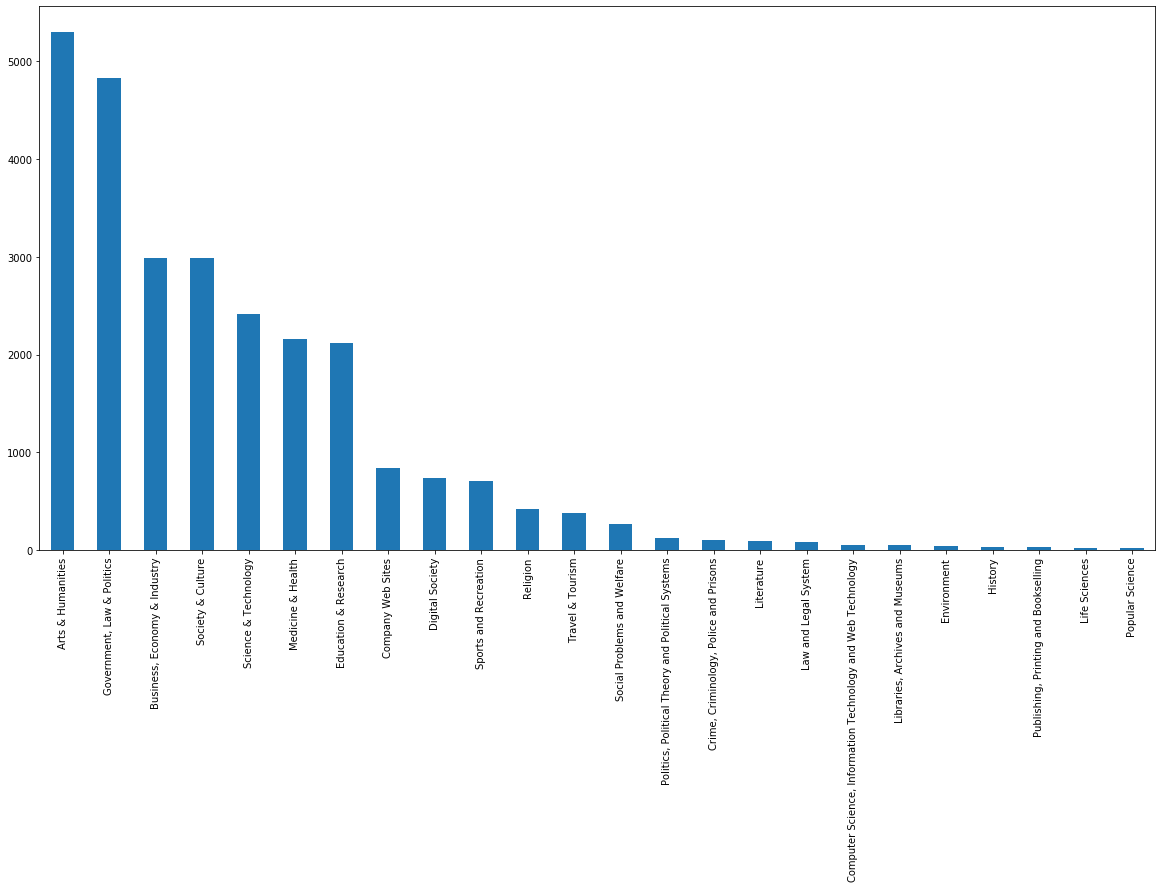

In [8]:
df.Category.value_counts().plot.bar(figsize = (20,10))

In [9]:
print(df['Category'].value_counts())

Arts & Humanities                                              5299
Government, Law & Politics                                     4832
Business, Economy & Industry                                   2988
Society & Culture                                              2984
Science & Technology                                           2420
Medicine & Health                                              2164
Education & Research                                           2118
Company Web Sites                                               843
Digital Society                                                 737
Sports and Recreation                                           710
Religion                                                        417
Travel & Tourism                                                374
Social Problems and Welfare                                     270
Politics, Political Theory and Political Systems                123
Crime, Criminology, Police and Prisons          

In [10]:
df.isna().sum()

Category    0
Title       0
dtype: int64

In [11]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Category,Title
0,"Government, Law & Politics",Eric Martlew MP
1,Arts & Humanities,BBC News: Looking back to the future of video ...
2,Science & Technology,Research Councils UK (RCUK)
3,"Government, Law & Politics",South Wales Police & Crime Commissioner
4,Science & Technology,NRPB - National Radiological Protection Board


In [20]:
from sklearn.model_selection import train_test_split
X = df.Title
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)
print(X_train)
X_train.shape

26113             Building Cost Information Service (BCIS)
9774                        Advisory Service for Squatters
19780                                 Endurance Technology
26473                                       Darwin Country
24465    Family Policy Studies Centre, University of Ox...
                               ...                        
21575                                     Keith Nevols PPC
5390                                  textadventures.co.uk
860                                    Kore Technology Ltd
15795                          Newcastle Liberal Democrats
23654                       BP: Fuelling the Olympic Dream
Name: Title, Length: 21438, dtype: object


(21438,)

In [21]:
# Naive bayes vs Multinomial naive bayes
# For n dimensional data with k classes, in naive bayes, we have to assume some probability distribution for every
# dimension,class pair ; but in mnb we simply assume multinomial distribution for all the pairs.
from sklearn.naive_bayes import MultinomialNB

# Pipelining - Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit 
# and transform methods and the final estimator only needs to implement fit.
# making vectorizer => transformer => classifier 
from sklearn.pipeline import Pipeline

# tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended 
# to reflect how important a word is to a document in a collection or corpus
# TF - Term frequency(t,a) = no of occurrences of t in abstract(a) / no of words in abstract(a)
# IDF - inverse document frequency = log(no of documents/no of documents containing word t)
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
my_tags = ['Business, Economy & Industry' 'Education & Research' 'Literature'
 'Science & Technology' 'Arts & Humanities'
 'Crime, Criminology, Police and Prisons' 'Law and Legal System'
 'Company Web Sites' 'Medicine & Health' 'Religion' 'Society & Culture'
 'Social Problems and Welfare' 'Government, Law & Politics'
 'Digital Society'
 'Computer Science, Information Technology and Web Technology'
 'Environment' 'Travel & Tourism' 'Sports and Recreation'
 'Popular Science' 'Life Sciences' 'Libraries, Archives and Museums'
 'Politics, Political Theory and Political Systems'
 'Publishing, Printing and Bookselling' 'History']

mnb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
mnb.fit(X_train, y_train)
print(X_train)

# Import pickle Package
import pickle
# Save the Modle to file in the current working directory
Pkl_Filename = "Pickle_MNB_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(mnb, file)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(type(X_test), X_test)
y_pred = mnb.predict(X_test)
print(type(y_pred))

print('accuracy %s' % accuracy_score(y_pred, y_test))


print(confusion_matrix(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=my_tags))

26113             Building Cost Information Service (BCIS)
9774                        Advisory Service for Squatters
19780                                 Endurance Technology
26473                                       Darwin Country
24465    Family Policy Studies Centre, University of Ox...
                               ...                        
21575                                     Keith Nevols PPC
5390                                  textadventures.co.uk
860                                    Kore Technology Ltd
15795                          Newcastle Liberal Democrats
23654                       BP: Fuelling the Olympic Dream
Name: Title, Length: 21438, dtype: object
<class 'pandas.core.series.Series'> 26703                        RuneQuest/Glorantha Home Page
19064                    Thomas Jones Pencerrig: 1742-1803
26298                                             Usk Show
11430                                    Sick City Project
14533                     Change & In